<a href="https://colab.research.google.com/github/BigM66/MLA_MLP/blob/main/MLA1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1

Matthew Parsley

CS430

Machine Learning in the Cloud


In [1]:
# here is the code to import all required components
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# here is the code to read our dataset into our notebook and print the first 5 items of the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/weather_2012.csv", skiprows=1)
df.head()

,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
0,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
1,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
3,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
4,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog


In [3]:
# here is the code to show a sample of 5 random items from our dataset
df.sample(5)

,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
5809,2012-08-30 02:00:00,15.4,12.1,81,11,25.0,100.97,Mostly Cloudy
6922,2012-10-15 11:00:00,16.6,12.4,76,17,24.1,99.61,Rain Showers
7339,2012-11-01 20:00:00,6.7,4.8,88,24,25.0,99.33,Rain
8714,2012-12-29 03:00:00,-13.4,-15.2,86,4,4.8,101.33,Fog
734,2012-01-31 15:00:00,-8.2,-12.0,74,17,1.0,101.22,Snow


In [4]:
# here is the code to show the last 5 items of our data
df.tail()

,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
8778,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8779,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8780,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8781,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8782,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [5]:
# here is the code to generate the information about the columns in our file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783 entries, 0 to 8782
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2012-01-01 00:00:00  8783 non-null   object 
 1   -1.8                 8783 non-null   float64
 2   -3.9                 8783 non-null   float64
 3   86                   8783 non-null   int64  
 4   4                    8783 non-null   int64  
 5   8.0                  8783 non-null   float64
 6   101.24               8783 non-null   float64
 7   Fog                  8783 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
# here is the code to generate the correct names for our columns
tsv_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/weather_2012.csv", names =  ["date_time", "temp_c",
                                                                                                              "dew_point",
                                                                                                              "relative_humidity",
                                                                                                              "wind_speed",
                                                                                                              "visibility",
                                                                                                              "pressure",
                                                                                                              "weather"], skiprows=1)
tsv_df.sample(5)

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
3539,2012-05-27 11:00:00,19.5,3.9,36,4,48.3,101.83,Cloudy
7097,2012-10-22 17:00:00,13.2,4.7,56,20,24.1,101.11,Mainly Clear
732,2012-01-31 12:00:00,-8.6,-13.3,69,22,4.0,101.36,Snow
1449,2012-03-01 09:00:00,-4.9,-7.5,82,32,1.6,100.60,Snow
6776,2012-10-09 08:00:00,8.4,6.0,85,15,48.3,102.08,Clear


In [7]:
#here is the code to show the numerical values of the numerical columns such as mean, median, and mode
tsv_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp_c,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
dew_point,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
relative_humidity,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
wind_speed,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
visibility,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
pressure,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


In [8]:
# here is the code to convert from Celcius to Fahrenheit and then store it
tsv_df['temp_f'] = tsv_df['temp_c']
tsv_df['temp_f'] = tsv_df['temp_f'] * 9.0/5.0 + 32

tsv_df['temp_f'].head()

,temp_f
0,28.76
1,28.76
2,28.76
3,29.30
4,29.30


In [9]:
columns = ['date_time', 'temp_f',	'temp_c',	'dew_point',	'relative_humidity',	'wind_speed',	'visibility',	'pressure',	'weather']
tsv_df =tsv_df[columns]

In [10]:
# here is the code to print the data types of the columns
print(tsv_df.dtypes)

date_time             object
temp_f               float64
temp_c               float64
dew_point            float64
relative_humidity      int64
wind_speed             int64
visibility           float64
pressure             float64
weather               object
dtype: object


In [11]:
# here is the code to create the date time column into actual dates and times
tsv_df['date_time'] = pd.to_datetime(tsv_df['date_time'])
tsv_df['date_time'].sample(5)

,date_time
6182,2012-09-14 14:00:00
1427,2012-02-29 11:00:00
8523,2012-12-21 03:00:00
1322,2012-02-25 02:00:00
4482,2012-07-05 18:00:00


In [12]:
#here is the code to generate the monthly average
monthly_avg = tsv_df.groupby(pd.PeriodIndex(tsv_df['date_time'], freq="M"))['temp_f'].mean()
print(monthly_avg)

date_time
2012-01    18.731290
2012-02    24.395000
2012-03    37.618226
2012-04    44.616750
2012-05    61.227984
2012-06    68.241250
2012-07    73.022097
2012-08    72.102742
2012-09    61.672000
2012-10    51.718952
2012-11    33.676500
2012-12    26.048629
Freq: M, Name: temp_f, dtype: float64


Text(0.5, 1.0, 'Scatter Plot of temp_f vs relative_humidity')

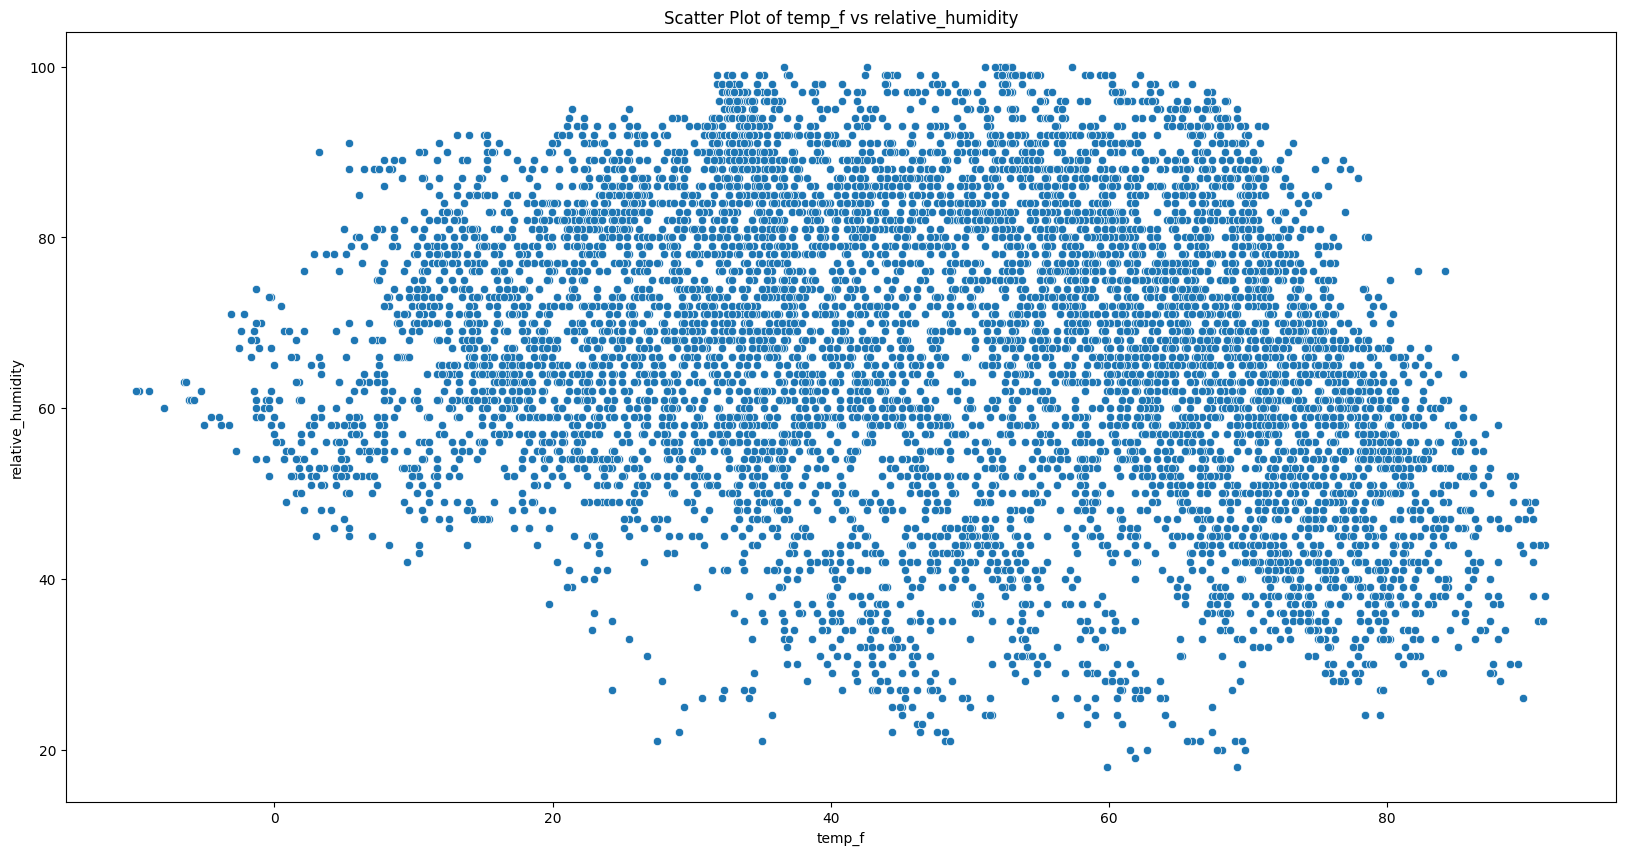

In [13]:
# here is the code to generate a scatter plot graph
plt.figure(figsize=(20, 10))
sns.scatterplot(x=tsv_df['temp_f'], y=tsv_df['relative_humidity'])
plt.title("Scatter Plot of temp_f vs relative_humidity")

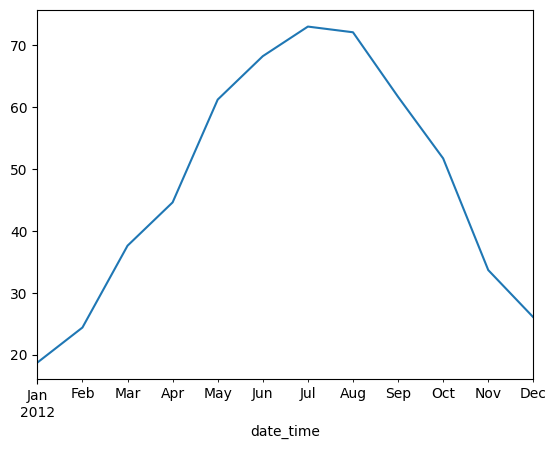

In [14]:
# here is the code to generate the line graph
monthly_avg.plot()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

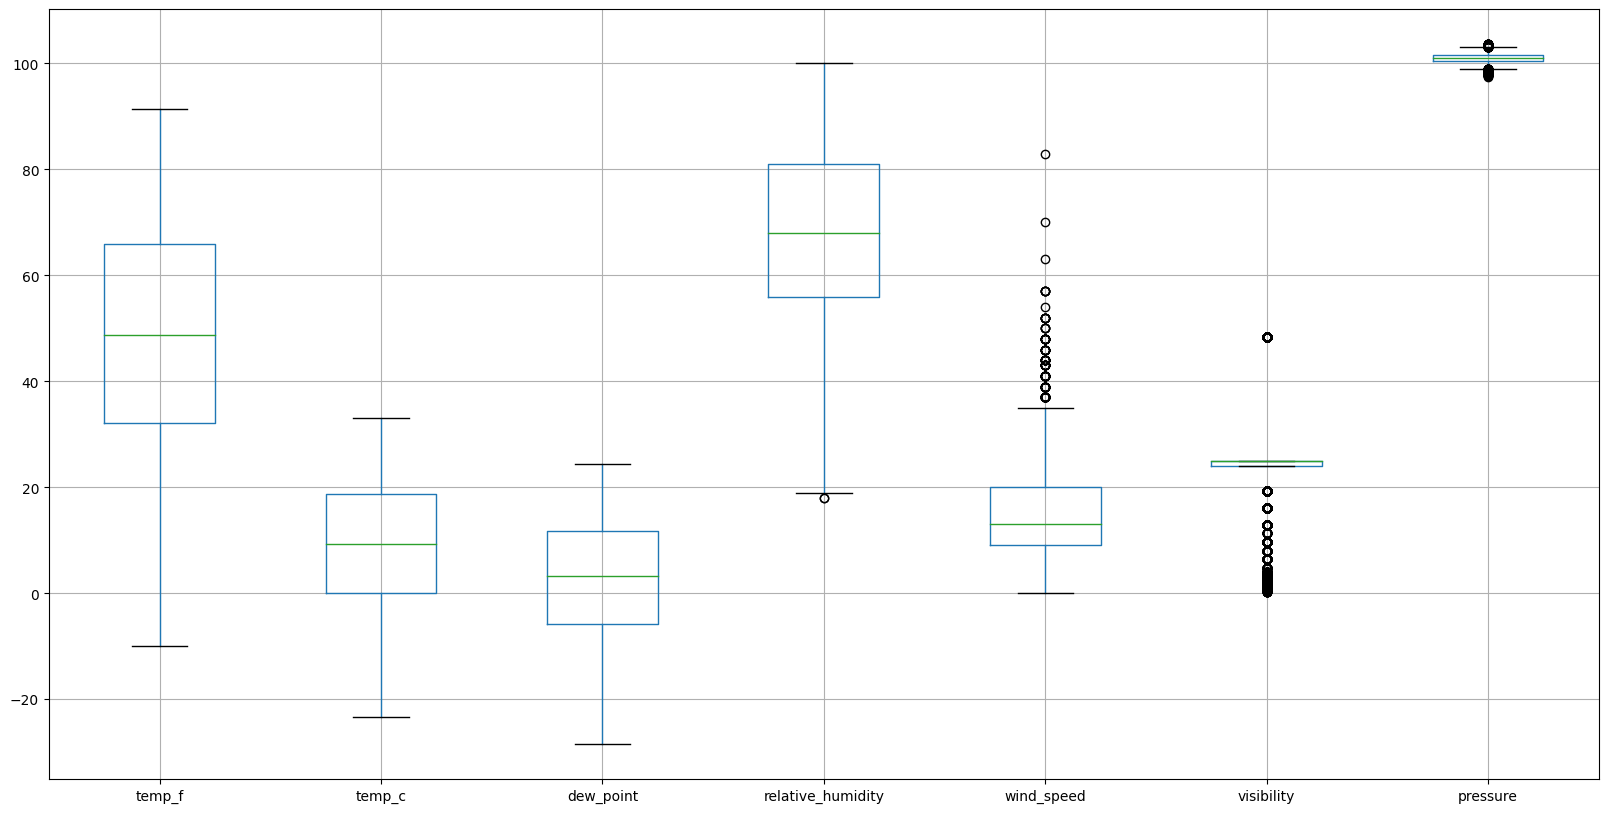

In [15]:
# here is the code to generate the box plot
tsv_df.boxplot()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()